<a href="https://colab.research.google.com/github/matinkp/covid-19-x-rey-cnn/blob/main/x_rey_covid_19_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download dataset from kaggle 
> Don't forget to downlaod your kaggle api key and upload it on your Gdrive.
>
> For this you can use this [link](https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/) and follow step 2.

In [1]:
! pip install kaggle ; mkdir ~/.kaggle ; cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download khoongweihao/covid19-xray-dataset-train-test-sets

covid19-xray-dataset-train-test-sets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
! unzip covid19-xray-dataset-train-test-sets.zip

Archive:  covid19-xray-dataset-train-test-sets.zip
replace xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Import libraries
          

In [6]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import tensorflow_hub as hub

In [7]:
train_dir = "/content/xray_dataset_covid19/train"
test_dir = "/content/xray_dataset_covid19/test"

In [8]:
import pathlib
dataset_url = "/content/xray_dataset_covid19"
data_dir = pathlib.Path(dataset_url)
normal_example = list(data_dir.glob('train/NORMAL/*'))
pneumonia_example = list(data_dir.glob('train/PNEUMONIA/*'))

Text(0.5, 1.0, 'pneumonia case')

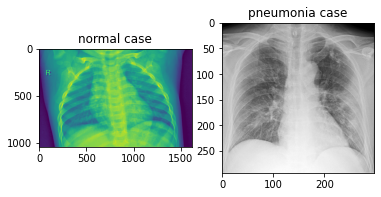

In [9]:
plt.subplot(1,2,1)
img1=plt.imread(normal_example[1])
plt.imshow(img1,filternorm=False)
plt.title("normal case")

plt.subplot(1,2,2)
img2=plt.imread(pneumonia_example[1])
plt.imshow(img2,filternorm=False)
plt.title("pneumonia case")


In [10]:
train_data_generator = ImageDataGenerator(rescale=1/255)
test_data_generator = ImageDataGenerator(rescale= 1/255)

train_generator = train_data_generator.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

test_generator = train_data_generator.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [11]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v1_101/classification/5",
               trainable=False, arguments=dict(batch_norm_momentum=0.997),input_shape=(150,150,3)),


  layers.Dense(32,activation='relu'),
  layers.Dropout(0.25),

  layers.Dense(1,activation='sigmoid')
])

model.compile(
    loss="binary_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              44656553  
_________________________________________________________________
dense (Dense)                (None, 32)                32064     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 44,688,650
Trainable params: 32,097
Non-trainable params: 44,656,553
_________________________________________________________________


In [13]:
history= model.fit(train_generator,
                   epochs=10,
                   validation_data = test_generator )

Epoch 1/10
5/5 [==============================] - 40s 6s/step - loss: 0.8553 - accuracy: 0.7027 - val_loss: 0.1332 - val_accuracy: 0.9500
Epoch 2/10
5/5 [==============================] - 29s 6s/step - loss: 0.2586 - accuracy: 0.9257 - val_loss: 0.1719 - val_accuracy: 0.9500
Epoch 3/10
5/5 [==============================] - 29s 6s/step - loss: 0.1156 - accuracy: 0.9459 - val_loss: 0.1679 - val_accuracy: 0.9500
Epoch 4/10
5/5 [==============================] - 29s 6s/step - loss: 0.0986 - accuracy: 0.9662 - val_loss: 0.1409 - val_accuracy: 0.9500
Epoch 5/10
5/5 [==============================] - 29s 6s/step - loss: 0.0794 - accuracy: 0.9595 - val_loss: 0.1443 - val_accuracy: 0.9500
Epoch 6/10
5/5 [==============================] - 29s 6s/step - loss: 0.0486 - accuracy: 0.9932 - val_loss: 0.1387 - val_accuracy: 0.9500
Epoch 7/10
5/5 [==============================] - 33s 7s/step - loss: 0.0460 - accuracy: 0.9662 - val_loss: 0.1452 - val_accuracy: 0.9500
Epoch 8/10
5/5 [==================

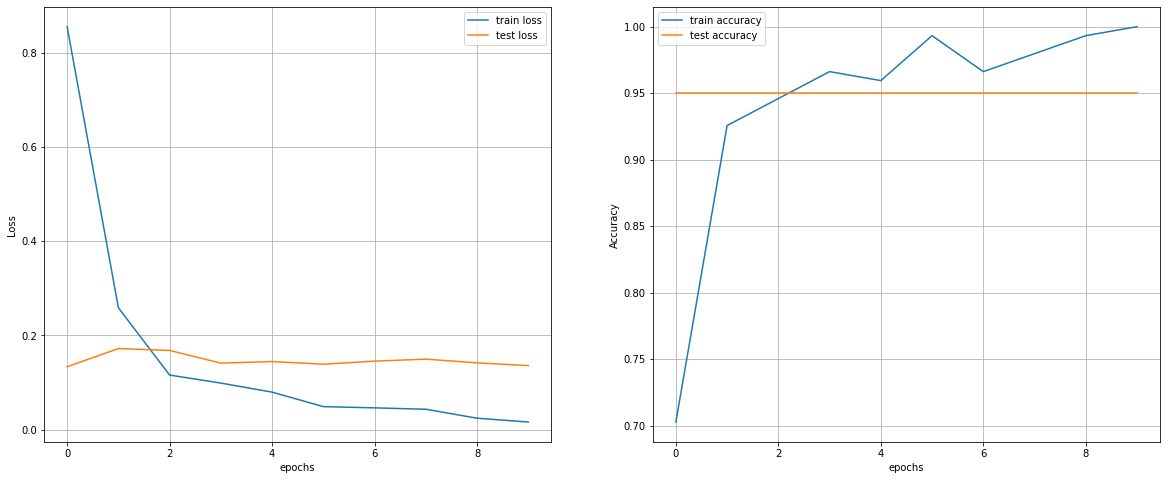

In [14]:
plt.figure(1,figsize=(20,8))
plt.subplot(1,2,1)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'test loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'test accuracy')
plt.grid(True)
plt.legend()